In [3]:
import pandas as pd 
db_train_transaction=pd.read_csv("C:/Users/JUAN BUITRAGO/Downloads/train_transaction.csv")
db_train_identity=pd.read_csv("C:/Users/JUAN BUITRAGO/Downloads/train_identity.csv")

In [4]:
db_train=pd.merge(db_train_transaction,db_train_identity,on='TransactionID',how='left')

Detección de fraude

Los datos proceden de transacciones reales de comercio electrónico de Vesta y contienen una amplia gama
de características, desde el tipo de dispositivo hasta las características del producto. El objetivo principal es
mejorar la eficacia de las alertas de transacciones fraudulentas para millones de personas en todo el mundo,
ayudando a cientos de miles de empresas a reducir sus pérdidas por fraude y aumentar sus ingresos. Y, por
supuesto, ahorrará a muchas personas la molestia de los falsos positivos.

-TransactionDT: Intervalo de tiempo a partir de una fecha y hora de referencia
-TransactionAMT: Importe del pago de la transacción en USD
-ProductCD: Código de producto, el producto de cada transacción
-card1 - card6 : Información de la tarjeta de pago, como tipo de tarjeta, categoría de tarjeta, banco
emisor, país, etc.
-addr : Dirección
-dist: Distancia
-P_ and (R_) emaildomain: Dominio de correo electrónico del comprador y del destinatario
-C1-C14 : Recuento, cuántas direcciones se encuentran asociadas a la tarjeta de pago, etc. El significado
real está codificado.

-D1-D15 : Intervalo de tiempo, como los días transcurridos entre la transacción anterior, etc.
-M1-M9 : Coinciden, como los nombres en la tarjeta y la dirección, etc.
-Vxxx : Vesta ofrece una gran variedad de funciones, como la clasificación, el recuento y otras relaciones
entre entidades.
-DeviceType: Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma digital
-DeviceInfo: Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma digital
-id_12 - id_38 : Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma
digital




In [5]:
db_train.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [6]:
db_train.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object

Se va a eliminar el TransactionID ya que no nos va a explicar nada, simplemente es el ID de la transaction y debe ser unico para cada fila

In [7]:
db_train=db_train.drop(columns="TransactionID")

In [8]:
db_train.shape

(590540, 433)

In [9]:
db_train.isna().sum().sort_values(ascending=False)

id_24      585793
id_25      585408
id_08      585385
id_07      585385
id_21      585381
            ...  
C6              0
C5              0
C1              0
C2              0
isFraud         0
Length: 433, dtype: int64

hay columnas que tienen muchos datos faltantes entonces para no sintetizarlos todos utilizando la imputacion con la mediana se eliminaran las columnas que tengan por lo menos el 70% de datos faltantes y ya el resto se mirara si se sintetizara ya que si las dejamos ahi podemos generar cesgos en los datos y es preferible un poco de perdida de información 

In [10]:
umbral = 0.7 * len(db_train)
db_train = db_train.dropna(thresh=umbral, axis=1)
db_train

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [11]:
db_train.isna().sum().sort_values(ascending=False)

M6               169360
V43              168969
V51              168969
V50              168969
V49              168969
                  ...  
C12                   0
C13                   0
C14                   0
TransactionDT         0
isFraud               0
Length: 201, dtype: int64

se decidio quitar las filas que tienen datos faltantes para asi poder seguir con el problema y ya que no estaba dejando seguir por el uso de memoria RAM, se prefirio la perdida de informacion que cesgar la informacion

In [12]:
db_train=db_train.dropna()
db_train

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
1,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,135.000000,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
5,0,86510,49.00,W,5937,555.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0,86522,159.00,W,12308,360.0,150.0,visa,166.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590533,0,15811029,107.95,W,13071,321.0,150.0,visa,226.0,debit,...,209.949997,209.949997,209.949997,209.949997,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,117.000000,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [13]:
db_train.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,328198.000000,3.281980e+05,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,...,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000
mean,0.019823,7.926088e+06,156.961231,9940.171610,351.741101,149.995332,202.494388,289.382665,86.994997,8.878183,...,45.879261,26.629731,53.638986,33.821684,22.422151,78.540445,42.972268,15.353196,29.394252,20.340968
std,0.139393,4.402259e+06,269.366337,4853.600469,156.041451,0.942253,39.209974,101.258474,0.584866,29.082409,...,156.740746,110.984782,199.541804,136.064523,197.586337,618.807484,355.235584,162.718536,220.999013,185.112388
min,0.000000,8.640100e+04,2.000000,1001.000000,100.000000,100.000000,100.000000,104.000000,16.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.221687e+06,49.000000,6207.000000,206.000000,150.000000,166.000000,204.000000,87.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.002878e+06,82.000000,9839.000000,343.000000,150.000000,226.000000,299.000000,87.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.157863e+07,154.970000,13960.000000,490.000000,150.000000,226.000000,330.000000,87.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.581113e+07,6450.970000,18395.000000,600.000000,231.000000,235.000000,536.000000,96.000000,344.000000,...,4789.899902,4159.899902,7519.870117,4489.850098,16239.000000,32517.000000,18560.000000,12289.719727,12289.719727,12289.719727


In [14]:
db_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328198 entries, 1 to 590539
Columns: 201 entries, isFraud to V321
dtypes: float64(193), int64(3), object(5)
memory usage: 505.8+ MB


In [15]:
columnas_categoricas = db_train.select_dtypes(include=['object','int64']).columns
columnas_categoricas

Index(['isFraud', 'TransactionDT', 'ProductCD', 'card1', 'card4', 'card6',
       'P_emaildomain', 'M6'],
      dtype='object')

In [16]:
columnas_categoricas = db_train.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M6'], dtype='object')

para simplicidad del EDA se escogeran 2 variables numericas y 2 variables categoricas para hacer el analisis de simetria, dispersion y demas.

Numericas= C1 y TransactionAmount
Categoricas= card4 y card6 

de todas formas se hara un analisis de correlacion y se mirara si estan correlacionadas primero con la variable target y 2 entre otras variables independientes y si estas no son importantes y/o salen por el analisis del VIF se realizara con las otras variables importante.


c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


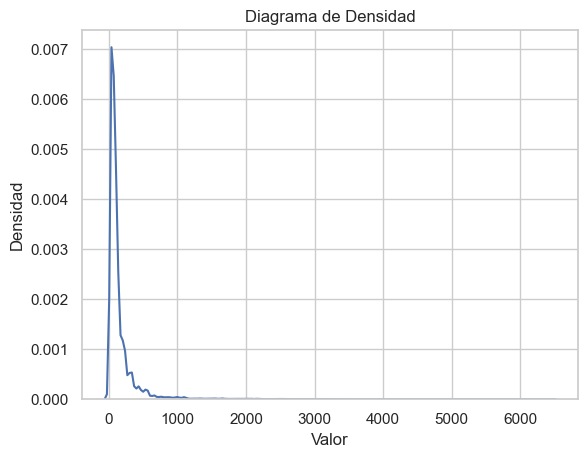

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear un diagrama de densidad utilizando seaborn
sns.set(style="whitegrid")  # Establecer el estilo del fondo del gráfico
sns.kdeplot(data=db_train, x=db_train['TransactionAmt'], common_norm=False)

# Mostrar el gráfico
plt.xlabel('Valor')  # Etiqueta del eje X
plt.ylabel('Densidad')  # Etiqueta del eje Y
plt.title('Diagrama de Densidad')  # Título del gráfico
plt.show()

este dato esta cesgado hacia la derecha y no se podria confiar en la media ya que esta siendo jalada por los datos atipicos 

c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


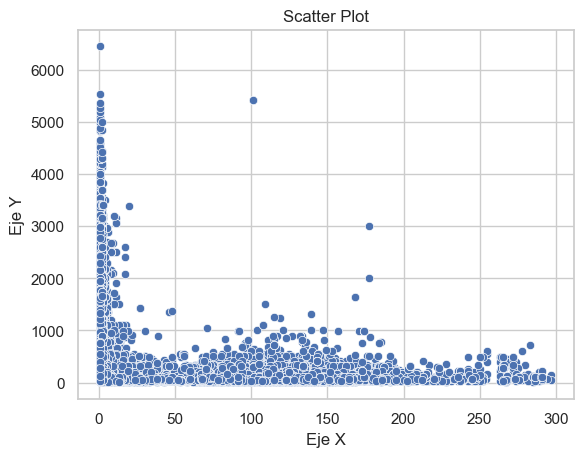

In [18]:

# Crear un scatter plot con seaborn
sns.scatterplot(x=db_train['C2'], y=db_train['TransactionAmt'], data=db_train)

# Mostrar el gráfico
plt.xlabel('Eje X')  # Etiqueta del eje X
plt.ylabel('Eje Y')  # Etiqueta del eje Y
plt.title('Scatter Plot')  # Título del gráfico
plt.show()

Se puede ver con este grafico que a medida que se aumenta el numero de direcciones asociadas la tarjeta de pago el importe de pago de la transaccion en USD disminuye su variabilidad por ejemplo cuando es cercano a 0 el rango es mucho mayor que en el otro extremo que es cuando es cercano a 300 

c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


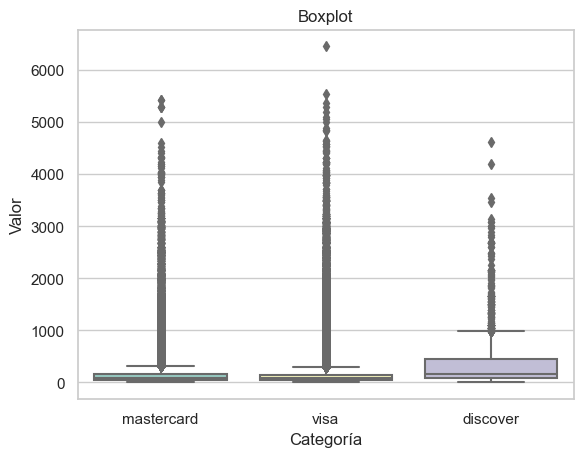

In [19]:
# Crear un boxplot con seaborn
sns.set(style="whitegrid")  # Establecer el estilo del fondo del gráfico
sns.boxplot(x=db_train['card4'], y=db_train['TransactionAmt'], data=db_train, palette="Set3")

# Mostrar el gráfico
plt.xlabel('Categoría')  # Etiqueta del eje X
plt.ylabel('Valor')  # Etiqueta del eje Y
plt.title('Boxplot')  # Título del gráfico
plt.show()

se puede ver que con mastercard y visa los datos atipicos son mucho mayores que con discover sin embargo se puede profundizar para ver si es la diferencia significativa entre cualquiera ya sea viSA O MASTERCAD con discover, se utilizara estadistica no parametrica para evitar el supuesto de normalidad ( de todas formas el diagrama de densidad incial nos pudo dar sospechas de que estos datos no siguen una distribucion normal al igual que nos lo puede decir el boxplot)

In [20]:
df_visa = db_train[db_train['card4'] == 'mastercard']
df_mastercard = db_train[db_train['card4'] == 'visa']
df_discover = db_train[db_train['card4'] == 'discover']

In [21]:
import scipy.stats as stats
# Realizar la prueba U de Mann-Whitney
stat, p_value = stats.mannwhitneyu(df_visa['TransactionAmt'], df_discover['TransactionAmt'], alternative='two-sided')  # 'two-sided' para una prueba de dos colas

# Mostrar el estadístico de la prueba y el valor p
print("Estadístico de la prueba U de Mann-Whitney:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Hay evidencia suficiente para decir que las medianas son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que las medianas son diferentes.")

Estadístico de la prueba U de Mann-Whitney: 60034960.0
Valor p: 3.748610376536109e-200
Se rechaza la hipótesis nula: Hay evidencia suficiente para decir que las medianas son diferentes.


se escogen dos colas ya que no se quiere saber direccion solo si es diferente y la prueba nos dice que si es estadisticamente signfica la diferencia de medianas 

se realizara onehotencoding ya que se va a mirar el VIF para hacer reduccion de dimensionalidad 

c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


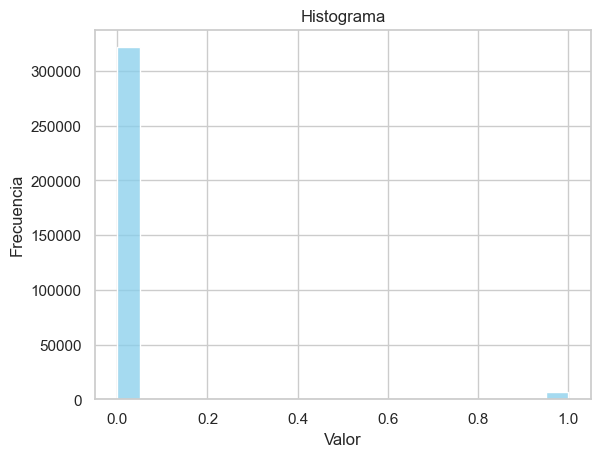

In [34]:
sns.set(style="whitegrid")  # Establecer el estilo del fondo del gráfico
sns.histplot(db_train['isFraud'], kde=False, color='skyblue')

# Mostrar el gráfico
plt.xlabel('Valor')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.title('Histograma')  # Título del gráfico
plt.show()

In [35]:
db_train['isFraud'].value_counts()

isFraud
0    321691
1      6506
Name: count, dtype: int64

In [22]:
db_train["ProductCD"].value_counts()

ProductCD
W    328198
Name: count, dtype: int64

como siempre es la misma se eliminara ya que no nos implica nada 

In [23]:
db_train=db_train.drop(columns='ProductCD')

para simplificar el ejercercicio se utilizara una muestra aleatoria y se conservara el problema de desbalanceo de los datos para asi poder calcular el VIF 

In [49]:
db_train_1 = db_train.sample(n=10000, random_state=42) 

In [50]:
numericas=db_train_1.drop(columns=['card4', 'card6', 'P_emaildomain', 'M6','isFraud'])
categoricas=db_train_1[['card4', 'card6', 'P_emaildomain', 'M6']]
y=db_train_1['isFraud']

In [25]:
#%pip install statsmodels

In [51]:
# Calcula el VIF para cada variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Variable'] = numericas.columns
vif_data['VIF'] = [variance_inflation_factor(numericas.values, i) for i in range(numericas.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)


c:\miniconda\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\miniconda\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\miniconda\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [54]:
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Variable,VIF
114,V100,inf
153,V280,inf
172,V299,inf
170,V297,inf
168,V295,inf
...,...,...
106,V92,NaN
107,V93,NaN
175,V302,NaN
176,V303,NaN


como nos estamos dando cuenta las V nos estan dando errores entonces borraremos esas variables de la base de datos 

In [64]:
# Obtener una lista de todas las columnas que comienzan con 'V'
columnas_a_eliminar = [col for col in db_train.columns if col.startswith('V')]

# Eliminar las columnas que comienzan con 'V'
db_train = db_train.drop(columns=columnas_a_eliminar)

In [65]:
db_train.shape

(328197, 31)

repitiremos el proceso del VIF 

In [66]:
numericas=db_train.drop(columns=['card4', 'card6', 'P_emaildomain', 'M6','isFraud'])
categoricas=db_train[['card4', 'card6', 'P_emaildomain', 'M6']]
y=db_train_1['isFraud']

In [67]:
vif_data = pd.DataFrame()
vif_data['Variable'] = numericas.columns
vif_data['VIF'] = [variance_inflation_factor(numericas.values, i) for i in range(numericas.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

c:\miniconda\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [68]:
vif_data

,Variable,VIF
7,addr2,11765.325615
4,card3,11754.842454
8,C1,347.726366
18,C11,229.032856
21,C14,183.475479
9,C2,164.799331
16,C9,74.908488
13,C6,66.484394
20,C13,31.169034
5,card5,28.182241


In [82]:
db_train=db_train.drop(columns={"C3","C4","C7","C8","C10"})
numericas=db_train.drop(columns=['card4', 'card6', 'P_emaildomain', 'M6','isFraud'])
categoricas=db_train[['card4', 'card6', 'P_emaildomain', 'M6']]
y=db_train_1['isFraud']

In [97]:
var=6
while var>5 :
    vif_data = pd.DataFrame()
    vif_data['Variable'] = numericas.columns
    vif_data['VIF'] = [variance_inflation_factor(numericas.values, i) for i in range(numericas.shape[1])]
    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    vif_data = vif_data.reset_index(drop=True)
    var=vif_data["VIF"][0]
    if var>5:
        X=vif_data["Variable"][0]
        numericas=numericas.drop(columns=X)

In [98]:
vif_data

,Variable,VIF
0,card2,4.008695
1,card1,3.682578
2,TransactionDT,3.496844
3,D4,3.142892
4,D10,2.842657
5,D1,2.382898
6,TransactionAmt,1.326302
7,C13,1.156903
8,C12,1.123702


Para entrenar el modelo solo nos vamos a quedar con estas variables numericas y las categoricas las vamos a eliminar con el heatmap de chicuadrado 

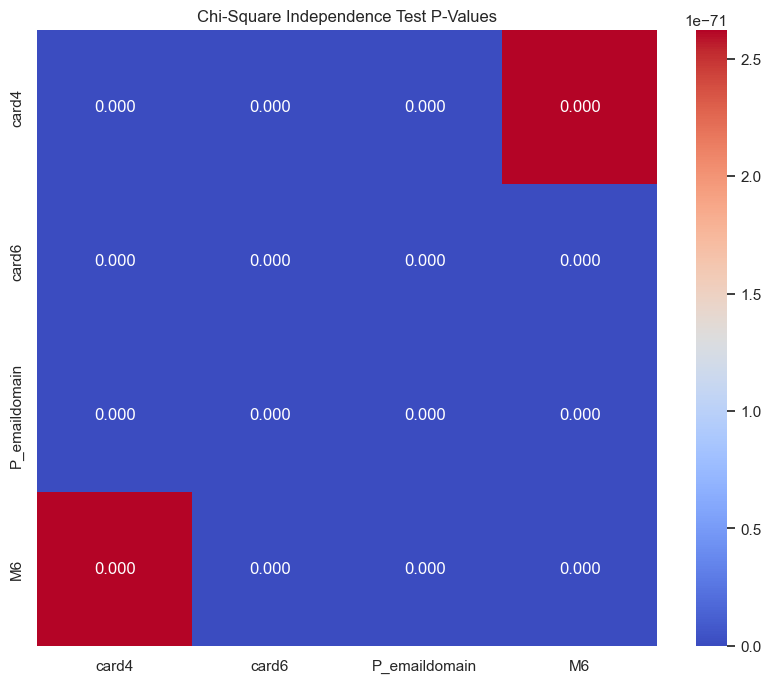

In [99]:
from scipy.stats import chi2_contingency


p_values = []
columns = categoricas.columns  # Obtener el nombre de las columnas
for col1 in columns:
    row_pvalues = []
    for col2 in columns:
        contingency_table = pd.crosstab(categoricas[col1], categoricas[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        row_pvalues.append(p)
    p_values.append(row_pvalues)

# Crear un DataFrame con los p-values y los nombres de las columnas
p_values_df = pd.DataFrame(p_values, columns=columns, index=columns)

# Crear un heatmap con los p-values
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Chi-Square Independence Test P-Values')
plt.show()


In [102]:
contingency_table = pd.crosstab(categoricas["card4"], categoricas["M6"])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(p)

2.6241152573228588e-71


como todas dieron menor a 0.05 significan que hay pruebas para decir que son dependientes entonces para evitar multicolinealidad se sacaran de la prueba menos 1 que sera card4 

In [125]:
 variables=["card4","card2","card1","TransactionDT","D4","D10","D1","TransactionAmt","C13","C12"]
X=db_train[variables]
X=pd.get_dummies(X, dtype=float)
Y=db_train["isFraud"]
 

COMENZAMOS CON LOS MODELOS DE CLASIFICACION 

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [127]:
y_train.value_counts()

isFraud
0    241305
1      4842
Name: count, dtype: int64

esta desbalanceado por lo que se hara el respectivo balanceo de los datos 

In [128]:
from imblearn.over_sampling import RandomOverSampler
# Inicializar el objeto RandomOverSampler
ros = RandomOverSampler(random_state=42)  # Puedes ajustar el estado aleatorio según sea necesario

# Aplicar Random Oversampling a tus datos de entrenamiento
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Diferentes valores para el número de vecinos
    'p': [1, 2]  # Diferentes valores para la métrica de distancia (Manhattan y Euclidiana)
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)  # cv es el número de divisiones en la validación cruzada
grid_search.fit(X_train_resampled, y_train_resampled)  # X_train y y_train son tus datos de entrenamiento


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]})

In [132]:
mejores_hiperparametros = grid_search.best_params_
mejor_modelo = grid_search.best_estimator_

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred = mejor_modelo.predict(X_test)

# Calcular métricas
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_conf_matrix = confusion_matrix(y_test, y_pred)

In [136]:
from sklearn.metrics import roc_auc_score
knn_auc = roc_auc_score(y_test, mejor_modelo.predict_proba(X_test)[:, 1])
print("AUC for knn: {:.3f}".format(knn_auc))

AUC for MLP: 0.653


In [138]:
models = ['KNN', 'Ridge', 'Lasso', 'Naive Bayes', 'XGBoost', 'SVM', 'MLP']
precisions = []
recalls = []
f1_scores = []
auc_scores = []

precisions.append(knn_precision)
recalls.append(knn_recall)
f1_scores.append(knn_f1)
auc_scores.append(knn_auc)

In [139]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
param_grid = {
'alpha':[0.1,1,2,3,10]
}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)  # cv es el número de divisiones en la validación cruzada
grid_search.fit(X_train_resampled, y_train_resampled)


c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.37886e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.37941e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.37154e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.36017e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 2, 3, 10]})

In [140]:
mejores_hiperparametros_ridge = grid_search.best_params_
mejor_modelo_ridge = grid_search.best_estimator_

In [141]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred = mejor_modelo_ridge.predict(X_test)

# Calcular métricas
ridge_accuracy = accuracy_score(y_test, y_pred)
ridge_precision = precision_score(y_test, y_pred)
ridge_recall = recall_score(y_test, y_pred)
ridge_f1 = f1_score(y_test, y_pred)
ridge_conf_matrix = confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
knn_auc = roc_auc_score(y_test, mejor_modelo.predict_proba(X_test)[:, 1])
print("AUC for knn: {:.3f}".format(knn_auc))

In [ ]:
precisions.append(ridge_precision)
recalls.append(ridge_recall)
f1_scores.append(ridge_f1)
auc_scores.append(ridge_auc)